In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Background:
The property company buying and selling houses has a problem that needs to be resolved based on sales data in the King Country area.

Problem:
- Sales decline
- The company does not have a precise benchmark for house prices
- Companies find it difficult to determine the price of the house -> buy
                                                -> for resale
                                                
                                                
Goals:                                           
- Increase sales
    -> increase profits by buying a house according to specifications (using ML)
    -> increase profits by selling houses according to specifications (using ML)

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
pd.set_option('max_columns', None)


In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
a = []
for i in df['date']:
    a.append(i[0:8])

In [7]:
df['date'] = a

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df['date'] = df['date'].astype('datetime64')

In [10]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [12]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
# sns.pairplot(df)
# plt.show()

C:\Users\elvin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


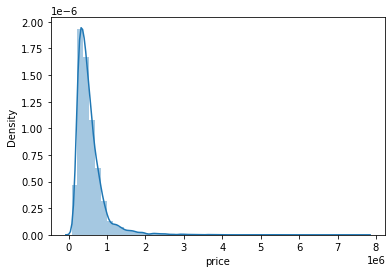

In [14]:
sns.distplot(df['price'])
plt.show()

The distribution of the data based on the chart above tends to be left skewed where there are many outliers who tend to be on the right -> the outliers value is higher than the average value of the price.


C:\Users\elvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


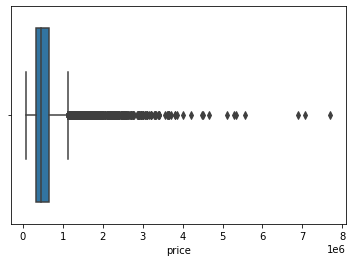

In [15]:
sns.boxplot(df['price'])
plt.show()

There are outliers in the price data, the position of the outliers is above the upper fence

In [16]:
outliers = []
def outlier_check(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    for i in data:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers

In [17]:
len(outlier_check(df['price']))

1146

There were 1146 outliers

In [18]:
df_outlier = df[df['price'].isin(outliers)]


In [19]:
df_outlier.sort_values('price', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4623,2581900165,2014-10-21,1130000.0,4,3.50,4300,8406,2.0,0,1,3,11,3580,720,1987,0,98040,47.5396,-122.214,2770,10006
4680,9471201110,2015-04-06,1130000.0,4,1.75,2370,8400,1.0,0,0,5,9,1270,1100,1949,0,98105,47.6716,-122.264,2370,8400
11927,3528000310,2015-04-27,1130000.0,5,2.50,4310,28008,2.0,0,0,3,10,4310,0,1988,0,98053,47.6662,-122.056,3170,28559
20729,3758900023,2014-05-21,1130000.0,4,3.25,3810,8519,1.0,0,1,3,10,2680,1130,2007,0,98033,47.6990,-122.207,3240,10748


In [20]:
df_outlier.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.146000e+03,1.146000e+03,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000
mean,4.170926e+09,1.667087e+06,4.104712,3.242147,3943.389180,23975.275742,1.820681,0.089005,1.335079,3.464223,9.912740,3218.218150,725.171030,1974.472077,258.016579,98066.938918,47.616567,-122.225166,3134.870855,18507.986911
std,2.832425e+09,6.523358e+05,0.928649,0.890846,1233.067707,59535.470266,0.485960,0.284876,1.568614,0.708669,1.182579,1152.299771,712.649108,32.765271,670.317202,55.302390,0.058931,0.108148,845.057150,38054.596107
min,3.100016e+07,1.130000e+06,0.000000,0.000000,1560.000000,609.000000,1.000000,0.000000,0.000000,1.000000,6.000000,1040.000000,0.000000,1900.000000,0.000000,98004.000000,47.329300,-122.451000,1100.000000,1224.000000
25%,1.700692e+09,1.260125e+06,4.000000,2.500000,3120.000000,7226.750000,1.500000,0.000000,0.000000,3.000000,9.000000,2352.500000,0.000000,1951.000000,0.000000,98008.000000,47.575850,-122.289000,2552.500000,6854.000000
50%,3.628845e+09,1.450000e+06,4.000000,3.250000,3790.000000,11495.500000,2.000000,0.000000,0.000000,3.000000,10.000000,3060.000000,700.000000,1985.000000,0.000000,98040.000000,47.626300,-122.225000,3055.000000,11056.500000
75%,6.562150e+09,1.813750e+06,5.000000,3.750000,4487.500000,19438.250000,2.000000,0.000000,3.000000,4.000000,11.000000,3920.000000,1200.000000,2003.000000,0.000000,98112.000000,47.648150,-122.183000,3717.500000,17592.250000
max,9.831201e+09,7.700000e+06,10.000000,8.000000,13540.000000,920423.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.773500,-121.756000,6210.000000,858132.000000


Outliers are not caused by incorrectly inputting data

In [21]:
# plt.figure(figsize=(15,12))
# sns.heatmap(df.corr('spearman'), annot=True)
# plt.show()

#notes
- Floors : 1 - 3.5
- Waterfornt  : 0-1
- View : 0-4
- Condition  : 1-5
- grade : 1 - 13
- year built : 1951 - 2015
- 
645000

In [22]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
#Penambahan kolom
renovasi = []
for i in df['yr_renovated']:
    if i == 0:
        renovasi.append('Not renovated')
    else:
        renovasi.append('renovated')

In [24]:
df['renovated'] = renovasi

In [25]:
#tambah kolom -> price berdasarkan quatile
kelas = []
for i in df['price']:
    if i >= 645000:
        kelas.append('First Class')
    elif i >= 450000:
        kelas.append('Second Class')
    elif i >= 321950:
        kelas.append('Third Class')
    else:
        kelas.append('Fourth Class')

In [26]:
df['class'] = kelas

In [27]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,class
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Not renovated,Fourth Class
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,renovated,Second Class
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Not renovated,Fourth Class
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Not renovated,Second Class
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Not renovated,Second Class


In [28]:
df.drop(columns = ['id', 'zipcode'], inplace = True) #tidak digunakan

In [29]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,renovated,class
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,Not renovated,Fourth Class
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,renovated,Second Class
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,Not renovated,Fourth Class
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,Not renovated,Second Class
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,Not renovated,Second Class


In [30]:
df['date'] = df['date'].dt.strftime('%Y-%m')
date_prep = []
for i in df['date']:
    date_prep.append(int(i[0:4]))
df['year_buy'] = date_prep
df['house_age'] = df['year_buy'] - df['yr_built']

In [31]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,renovated,class,year_buy,house_age
0,2014-10,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,Not renovated,Fourth Class,2014,59
1,2014-12,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,renovated,Second Class,2014,63
2,2015-02,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,Not renovated,Fourth Class,2015,82
3,2014-12,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,Not renovated,Second Class,2014,49
4,2015-02,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,Not renovated,Second Class,2015,28


In [32]:
#house age
df.house_age.min()

-1

In [33]:
df[df['house_age'] == -1]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,renovated,class,year_buy,house_age
1763,2014-06,597326.0,4,4.00,3570,8250,2.0,0,0,3,10,2860,710,2015,0,47.5784,-122.226,2230,10000,Not renovated,Second Class,2014,-1
2687,2014-10,385195.0,1,1.00,710,6000,1.5,0,0,3,6,710,0,2015,0,47.5756,-122.316,1440,4800,Not renovated,Third Class,2014,-1
7526,2014-12,614285.0,5,2.75,2730,6401,2.0,0,0,3,8,2730,0,2015,0,47.7685,-122.160,2520,6126,Not renovated,Second Class,2014,-1
8039,2014-06,455000.0,2,1.50,1200,1259,2.0,0,0,3,8,1000,200,2015,0,47.6001,-122.298,1320,1852,Not renovated,Second Class,2014,-1
14489,2014-08,500000.0,2,2.25,1570,1269,2.0,0,0,3,9,1280,290,2015,0,47.6514,-122.385,1570,6000,Not renovated,Second Class,2014,-1
17098,2014-06,350000.0,3,2.00,1380,3600,3.0,0,0,3,8,1380,0,2015,0,47.6074,-122.305,1480,3600,Not renovated,Third Class,2014,-1
19805,2014-08,455000.0,3,1.75,1320,1014,3.0,0,0,3,9,1320,0,2015,0,47.6047,-122.305,1380,1495,Not renovated,Second Class,2014,-1
20770,2014-08,357000.0,5,2.50,2990,9240,2.0,0,0,3,8,2990,0,2015,0,47.7384,-122.348,1970,18110,Not renovated,Third Class,2014,-1
20852,2014-07,595000.0,4,3.25,3730,4560,2.0,0,0,3,9,2760,970,2015,0,47.6725,-122.330,1800,4560,Not renovated,Second Class,2014,-1
20963,2014-07,230000.0,3,1.50,1040,1264,2.0,0,0,3,9,900,140,2015,0,47.5951,-122.301,1350,3000,Not renovated,Fourth Class,2014,-1


There are several rows entered incorrectly, so we need to delete this data

In [34]:
df = df[df['house_age'] >=0]

In [35]:
df['house_age'].min()

0

# EDA

In [36]:
house_sales= df[['price', 'date']].groupby('date').count().reset_index()
house_sales.columns = ['date', 'number of house sold']


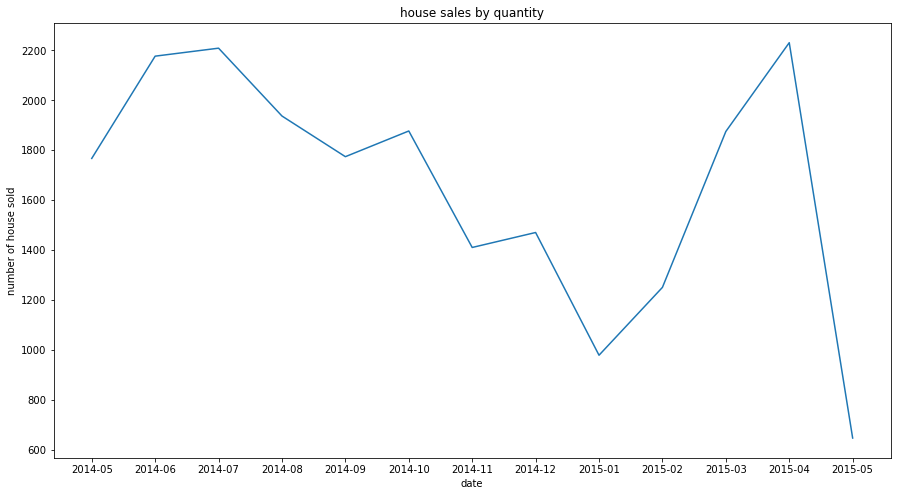

In [37]:
plt.figure(figsize = (15,8))
sns.lineplot(x = house_sales['date'], y = house_sales['number of house sold'], ci = None)
plt.title('house sales by quantity')
plt.show()

Based on the chart above, the highest sales were in 2015 in April, while the lowest sales were in 2015 in January. For 2014, sales data from December tended to decline. The sales trend in 2015 has increased.

In [38]:
house_class = df[['class', 'price']].groupby('class').count().reset_index()
house_class.columns = ['class', 'quantity sold']

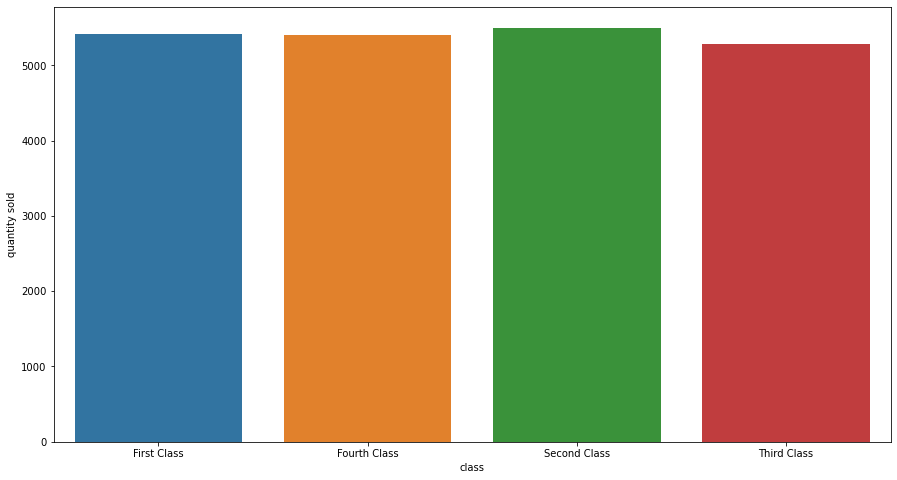

In [39]:
plt.figure(figsize = (15,8))

sns.barplot(x= house_class['class'], y = house_class['quantity sold'])
plt.show('Jumlah rumah terjual berdasarkan kelas')
plt.show()

First Class = price greater than Q3 -> 645000
Second Class = Q2 >= price > Q3
Third Class = Q1 >= price > Q2
Fourth Class = price < Q1

Based on the chart above, the four classes have almost the same sales. Because the sales of the four classes are almost the same, it can be said that the four classes have the same performance when compared to the others. The price of a house is very dependent on the specifications of the house. Finding out more about prices needs to be done to find out what factors affect house prices so that companies can find out what kind of house specifications have a higher value. Higher value in terms of price will also depend on customer needs. The more customers appreciate a 'value', the higher the value will be. 

In [40]:
bathrooms = df[['price', 'bathrooms']].groupby('bathrooms').mean().sort_values('bathrooms', ascending = False).reset_index()

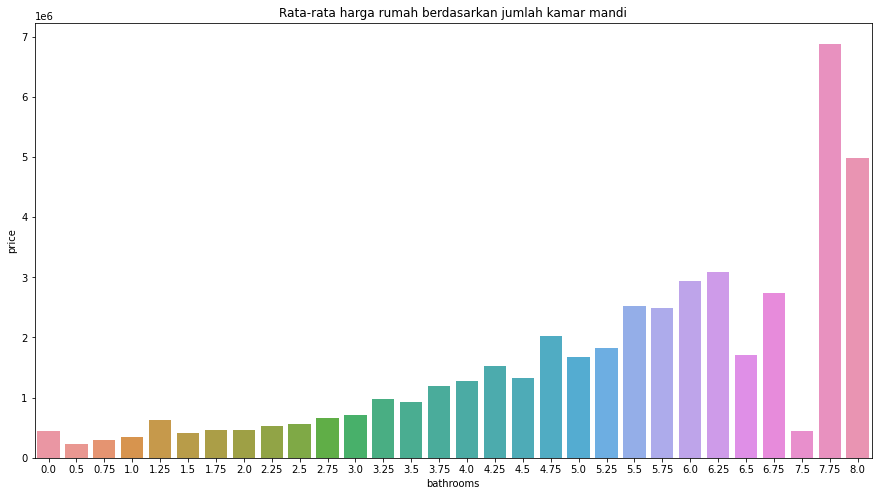

In [41]:
plt.figure(figsize = (15,8))
sns.barplot(x = bathrooms['bathrooms'], y = bathrooms['price'])
plt.title('Rata-rata harga rumah berdasarkan jumlah kamar mandi')
plt.show()

The number of bathrooms has an effect on house prices. Number of bathrooms 7.75 -> has the highest price.
When viewed from the overall graph, the more bathrooms the higher the price.
There are 1 outliers -> 7.5 bathrooms but the price is very low


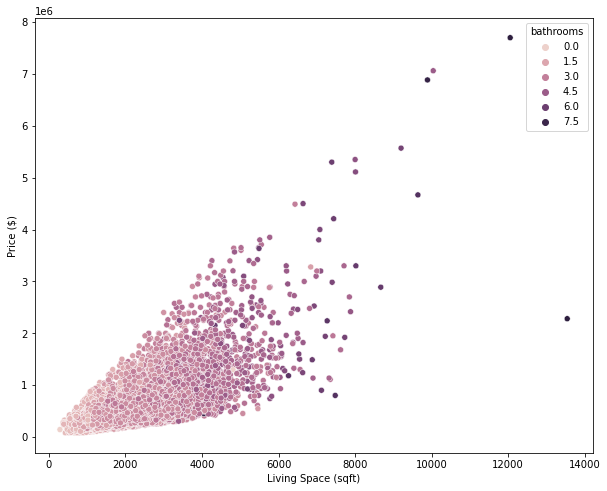

In [42]:
plt.figure(figsize=(10,8))
plot = sns.scatterplot(data=df, y='price', x='sqft_living', hue = 'bathrooms')
plt.xlabel("Living Space (sqft)")
plt.ylabel("Price ($)")
plt.show()

In [43]:
df[['bathrooms', 'sqft_living']].corr('spearman')

,bathrooms,sqft_living
bathrooms,1.000000,0.745421
sqft_living,0.745421,1.000000


The number of bathrooms and the size of the house, if you look at the correlation, has a positive correlation and the value is 0.74, which indicates that the more bathrooms, the bigger the house. And also based on the scatterplot above, the color of the point gets darker along with the size of the house itself.

In [44]:
kmr= df[['price', 'bathrooms']].groupby('bathrooms').count().sort_values('bathrooms', ascending = False).reset_index()

In [45]:
kmr.columns = ['bathrooms', 'quantity']

In [46]:
kmr.sort_values('quantity', ascending = False).head()

,bathrooms,quantity
20,2.50,5379
26,1.00,3851
23,1.75,3047
21,2.25,2046
22,2.00,1929


The house with 2.5 bathrooms is the most sold house

In [47]:
bedrooms = df[['price', 'bedrooms']].groupby('bedrooms').mean().reset_index().sort_values('bedrooms', ascending = False)

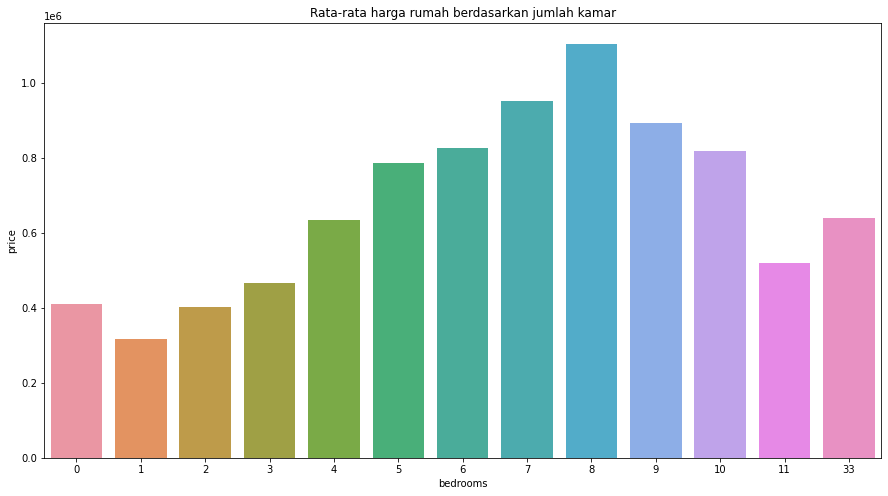

In [48]:
plt.figure(figsize = (15,8))
sns.barplot(x = bedrooms['bedrooms'], y = bedrooms['price'])
plt.title('Rata-rata harga rumah berdasarkan jumlah kamar')
plt.show()

Based on the graph, the number of bedrooms = 8 has the highest average price value. If you look at the graph, the house with 1 room to 8 rooms, the price is moving up. However, for houses with 9-11 rooms, the average price decreased.

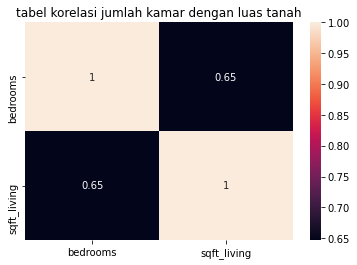

In [49]:
sns.heatmap(df[['bedrooms', 'sqft_living']].corr('spearman'), annot=True)
plt.title('tabel korelasi jumlah kamar dengan luas tanah')
plt.show()


The correlation table above indicates that the more the number of rooms, the larger the house area.

In [50]:
bedrooms2 = df[['price', 'bedrooms']].groupby('bedrooms').count().reset_index()
bedrooms2.columns = ['bedrooms', 'quantity']
bedrooms2.sort_values('quantity', ascending = False).head()

,bedrooms,quantity
3,3,9821
4,4,6880
2,2,2757
5,5,1598
6,6,272


The 3 bedroom house is the most sold house

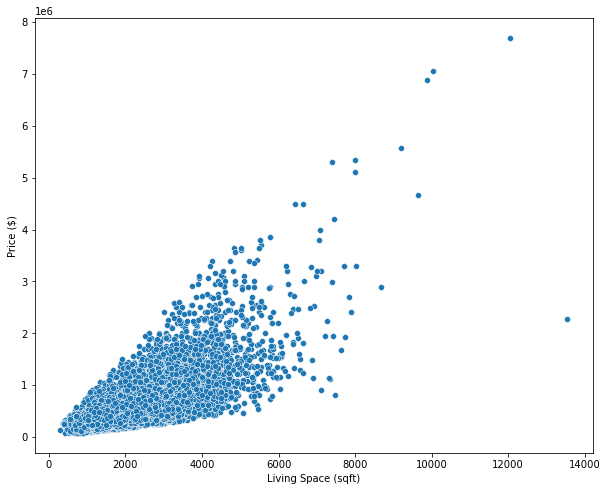

In [51]:
plt.figure(figsize=(10,8))
plot = sns.scatterplot(data=df, y='price', x='sqft_living', estimator = 'mean')
plt.xlabel("Living Space (sqft)")
plt.ylabel("Price ($)")
plt.show()

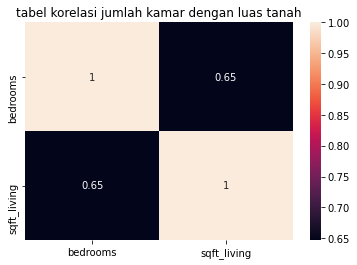

In [52]:
sns.heatmap(df[['bedrooms', 'sqft_living']].corr('spearman'), annot=True)
plt.title('tabel korelasi jumlah kamar dengan luas tanah')
plt.show()

The bigger the house, the more expensive the house price. This is a natural thing because the benchmark house price depends on the area of ​​the house and the area of ​​the land itself.

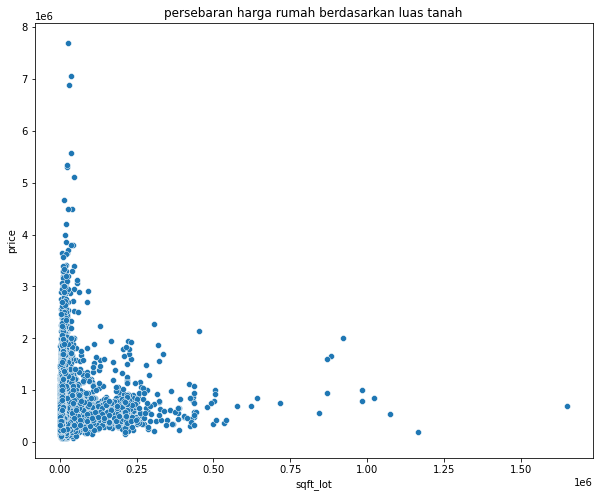

In [53]:
plt.figure(figsize=(10,8))
plot = sns.scatterplot(data=df, y='price', x='sqft_lot', estimator = 'mean')
plt.title('persebaran harga rumah berdasarkan luas tanah')
plt.show()

the points tend not to form a trend. The initial hypothesis is that the larger the land area, the higher the price, but this hypothesis is not proven based on the data we have. In fact, the area of the house determines the price more than the lot area.

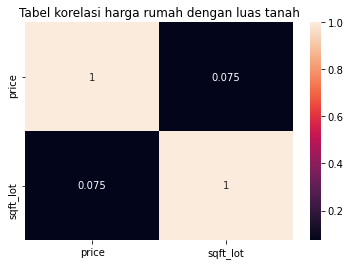

In [54]:
sns.heatmap(df[['price', 'sqft_lot']].corr('spearman'), annot=True)
plt.title('Tabel korelasi harga rumah dengan luas tanah')
plt.show()

Based on the correlation, the value is positive with a value of 0.075. This value is close to 0, meaning that this correlation can be said to be almost uncorrelated

-> the cost of building a house is more expensive than the price of the land
-> the price of material is higher than the price of land in the area.


In [55]:
floor = df[['floors','price']].groupby('floors').mean().reset_index()

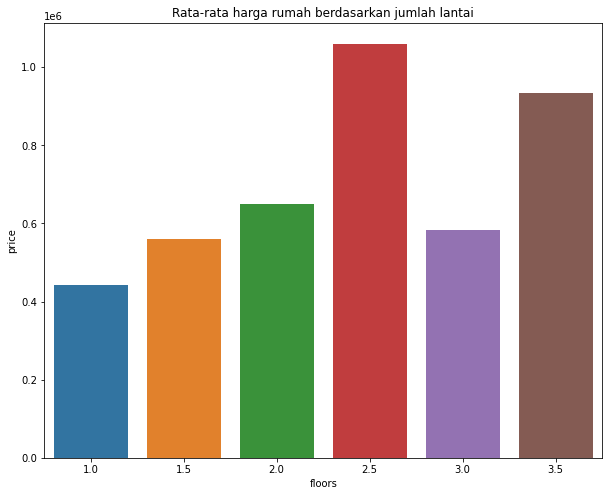

In [56]:
plt.figure(figsize=(10,8))
plot = sns.barplot(data=df, y='price', x='floors', ci = None)
plt.title('Rata-rata harga rumah berdasarkan jumlah lantai')
plt.show()

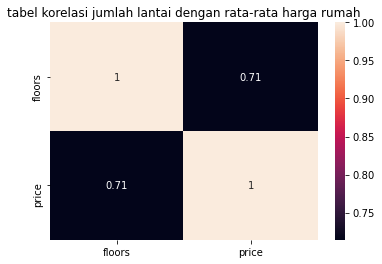

In [57]:
sns.heatmap(floor.corr('spearman'), annot = True)
plt.title('tabel korelasi jumlah lantai dengan rata-rata harga rumah')
plt.show()

Based on the graph above, the more floors there are, the more expensive the house is. The number of floors and the price have a positive and strong correlation whose value is 0.71

In [58]:
floor2= df[['floors','price']].groupby('floors').count().reset_index()

In [59]:
floor2.columns = ['floors', 'quantity']

In [60]:
floor2.sort_values('quantity', ascending = False)

,floors,quantity
0,1.0,10680
2,2.0,8234
1,1.5,1909
4,3.0,609
3,2.5,161
5,3.5,8


1-story house is the most sold house with total sales of 10680. This is followed by a 2-story house and a 1.5-story house.

In [61]:
view = df[['view', 'price']].groupby('view').mean().reset_index()


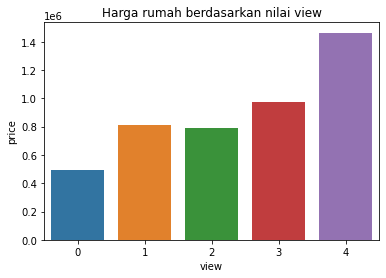

In [62]:
sns.barplot(x = view['view'], y = view['price'])
plt.title('Harga rumah berdasarkan nilai view')
plt.show()

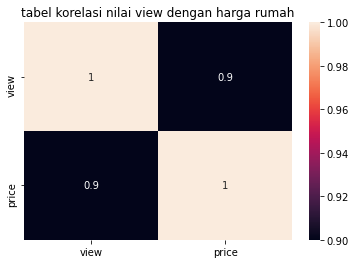

In [63]:
sns.heatmap(view.corr('spearman'), annot= True)
plt.title('tabel korelasi nilai view dengan harga rumah')
plt.show()

A house with a higher view value will have an effect on the price of the house itself. House with a view value of 4 -> the highest average price. View 0 -> average lowest price. If we look at the correlation, the view value has a positive correlation and a strong correlation value is -> 0.9

In [64]:
view2 = df[['view', 'price']].groupby('view').count().reset_index()
view2.columns = ['view', 'quantity']
view2.sort_values('quantity', ascending = False)

,view,quantity
0,0,19478
2,2,962
3,3,510
1,1,332
4,4,319


The house with a view value of 0 became the most sold house with 19478 houses sold. It can be concluded that the majority of spots / locations in King Country does not have a good environment

In [65]:
condition = df[['condition', 'price']].groupby('condition').mean().reset_index()

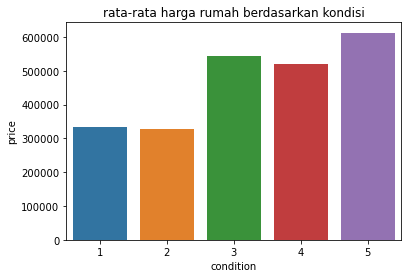

In [66]:
sns.barplot(x = condition['condition'], y = condition['price'])
plt.title('rata-rata harga rumah berdasarkan kondisi')
plt.show()

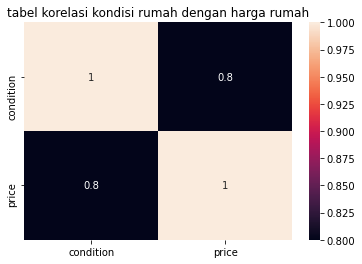

In [67]:
sns.heatmap(condition[['condition', 'price']].corr('spearman'), annot=True)
plt.title('tabel korelasi kondisi rumah dengan harga rumah')
plt.show()

A house with a higher condition value will have a higher price. With a positive correlation value and strong correlation.

In [68]:
kondisi = df[['condition', 'price']].groupby('condition').count().reset_index()

In [69]:
kondisi.columns = ['condition', 'quantity']

In [70]:
kondisi

,condition,quantity
0,1,30
1,2,172
2,3,14019
3,4,5679
4,5,1701


According to the table above, houses in poor condition have sold very few. Condition 1 -> 30 houses, condition 2-> 172 houses

In [71]:
grade = df[['grade', 'price']].groupby('grade').mean().reset_index()

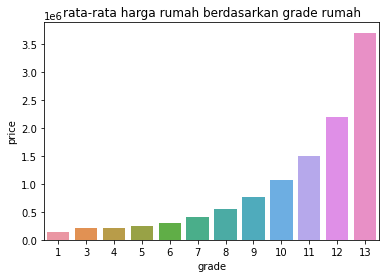

In [72]:
sns.barplot(x = grade['grade'], y = grade['price'])
plt.title('rata-rata harga rumah berdasarkan grade rumah')
plt.show()

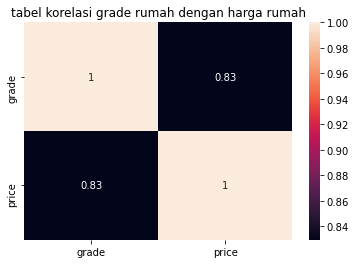

In [73]:
sns.heatmap(grade.corr(), annot = True)
plt.title('tabel korelasi grade rumah dengan harga rumah')
plt.show()

The grade of the house greatly affects the price of the house itself when viewed from the average price of the house

In [74]:
df[['grade', 'price']].groupby('grade').count().reset_index()

,grade,price
0,1,1
1,3,3
2,4,29
3,5,242
4,6,2037
5,7,8981
6,8,6063
7,9,2611
8,10,1132
9,11,399


7th grade houses are the most sold houses

In [75]:
yr = df[['yr_built', 'price']].groupby('yr_built').mean().sort_values('price', ascending = False).reset_index()

In [76]:
yr.head()

,yr_built,price
0,2015,895539.615385
1,1933,772050.000000
2,1905,752977.986486
3,2001,741030.796721
4,1909,696135.159574


The house with the highest average price is a house built in 2015, but we need to look at the correlation first.

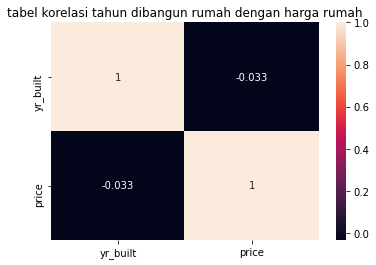

In [77]:
sns.heatmap(yr.corr(), annot = True)
plt.title('tabel korelasi tahun dibangun rumah dengan harga rumah')
plt.show()

Based on the correlation table, the correlation between the year it was built and the house price shows a negative correlation with a value close to 0. It means that house prices are not affected by the year the house was built.

In [78]:
yr2= df[['yr_built', 'price']].groupby('yr_built').count().sort_values('price', ascending = False)
yr2.columns = ['quantity']
yr2.head(10)

,quantity
yr_built,
2014,559
2006,454
2005,450
2004,433
2003,422
1977,417
2007,417
1978,387
1968,381


Based on the table above, most home sales are dominated by houses built in 2000 and above

In [79]:
df[['renovated', 'price']].groupby('renovated').mean()

,price
renovated,
Not renovated,530398.354957
renovated,760379.029540


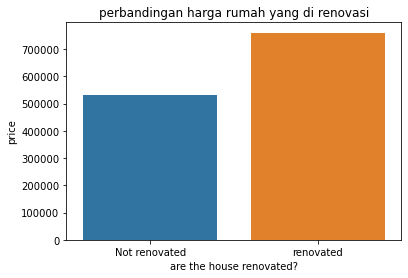

In [80]:
sns.barplot(data = df , x = 'renovated', y = 'price', ci = None)
plt.xlabel('are the house renovated?')
plt.title('perbandingan harga rumah yang di renovasi')
plt.show()

Based on the table above, the average price of a renovated house is higher than the average houses that were not renovated.

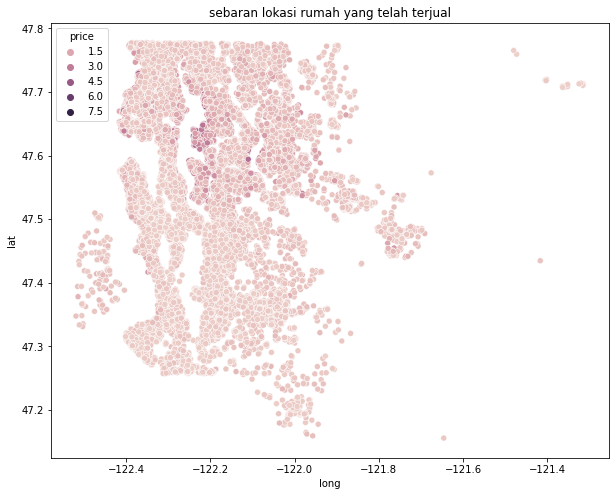

In [81]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = df, x = 'long', y = 'lat', hue = 'price')
plt.title('sebaran lokasi rumah yang telah terjual')
plt.show()

There are some areas that have higher prices than other regions -> lat 47.5 - 47.7. Long (-122.2) - (-122.4)

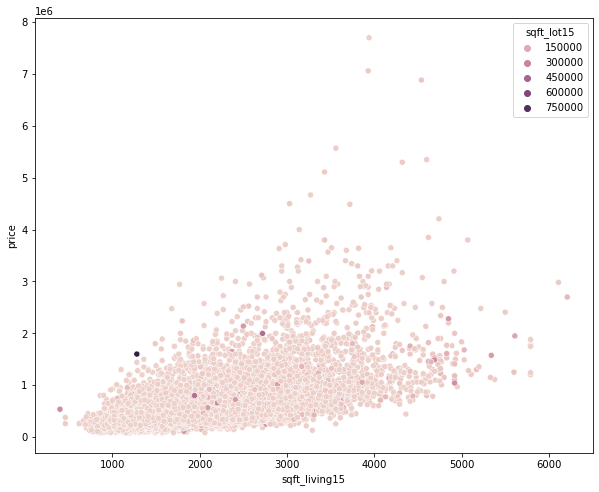

In [82]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = df, x = 'sqft_living15', y = 'price', hue = 'sqft_lot15')

plt.show()

In [83]:
df[['sqft_lot15', 'sqft_living15', 'price']].corr()

,sqft_lot15,sqft_living15,price
sqft_lot15,1.000000,0.183151,0.082423
sqft_living15,0.183151,1.000000,0.585383
price,0.082423,0.585383,1.000000


Same with sqftliving and sqft lot, sqftliving has more effect on house prices than sqftlots.

In [84]:
#Machine learning
df1 = df.copy()

In [85]:
df1.drop(columns = 'date', inplace = True)
df1.drop(columns = 'class', inplace = True)

In [86]:
df1.drop(columns = 'renovated', inplace = True)

In [87]:
df1.drop(columns = ['house_age', 'year_buy'], inplace = True)

In [88]:
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [90]:
## Base model
X = df1.drop(columns='price')
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42)

In [91]:
model1 =  LinearRegression()

In [92]:
model1.fit(X_train, y_train)

LinearRegression()

In [93]:
def EvaMatrix(Model, X,y_true):
    y_pred = Model.predict(X)
    R2 = r2_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    return R2, MAE, MSE, RMSE

In [94]:
r2_train, MAE_train, MSE_train, RMSE_train = EvaMatrix(model1, X_train, y_train)

In [95]:
r2_test, MAE_test, MSE_test, RMSE_test = EvaMatrix(model1, X_test, y_test)

In [96]:
data = {
    "Training" : [r2_train, MAE_train, MSE_train, RMSE_train],
    "Testing" : [r2_test, MAE_test, MSE_test, RMSE_test]
}
pd.DataFrame(data = data, index = ["R2", "MAE", "MSE", "RMSE"])

,Training,Testing
R2,6.968304e-01,6.905230e-01
MAE,1.247234e+05,1.266161e+05
MSE,3.903095e+10,4.927317e+10
RMSE,1.975625e+05,2.219756e+05


#Base model gets a R2 score of 0.69% for the train and test

In [97]:
## Optimize model

In [98]:
df_analysis = X_train.copy()
pred_train = model1.predict(X_train)

In [99]:
df_analysis['target'] = y_train
df_analysis['prediksi'] = pred_train

In [100]:
df_analysis.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,target,prediksi
16967,3,1.75,1410,6886,1.0,0,0,3,7,1410,0,1924,2013,47.7183,-122.353,1410,6561,465000.0,575633.498896
17232,2,1.75,1610,158558,1.5,0,0,2,6,1610,0,1948,0,47.5319,-121.840,1800,3572,280000.0,284196.688461
17884,2,1.00,930,6098,1.0,0,0,4,6,930,0,1919,0,47.5289,-122.030,1730,9000,360000.0,270949.879896
7230,5,2.50,1990,6840,2.0,0,0,4,7,1990,0,1974,0,47.7162,-122.166,1990,7150,438000.0,508810.702837
10161,4,3.00,3290,10783,2.0,0,0,3,9,3290,0,1990,0,47.3904,-122.178,2810,10783,449950.0,753462.968553


In [101]:
df_analysis['error'] = abs(df_analysis['target'] - df_analysis['prediksi'])

In [102]:
df_analysis.sort_values('error', ascending = False).head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,target,prediksi,error
7252,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,47.6298,-122.323,3940,8800,7700000.0,3.280244e+06,4.419756e+06
4411,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,47.6289,-122.233,3560,24345,5570000.0,2.275653e+06,3.294347e+06
8638,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,47.6208,-122.219,3720,14592,4489000.0,1.709686e+06,2.779314e+06
1315,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,47.5631,-122.210,4320,24619,5300000.0,2.658106e+06,2.641894e+06
1164,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,47.6767,-122.211,3430,26788,5110800.0,2.758464e+06,2.352336e+06


C:\Users\elvin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


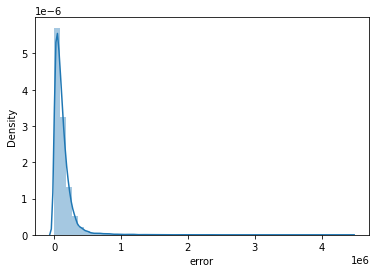

In [103]:
sns.distplot(df_analysis['error'])
plt.show()

The error distribution tends to be asymmetrical and has outliers

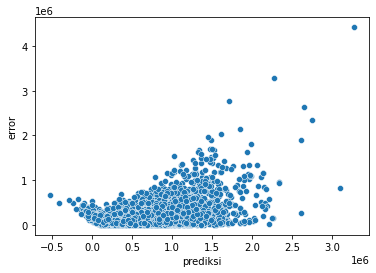

In [104]:
sns.scatterplot(x = df_analysis['prediksi'], y = df_analysis['error'])
plt.show()

This plot is not vertically distributed, or has outliers

In [105]:
#feature engineering
#Using transformer
#optimize1
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

In [106]:
yeo_pow = PowerTransformer(method='yeo-johnson')

In [107]:
pow1 = yeo_pow.fit_transform(df1.drop(columns = 'price'))

C:\Users\elvin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\elvin\anaconda3\lib\site-packages\numpy\core\_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2964: RuntimeWarning: overflow encountered in power
  out[~pos] = -(np.power(-x[~pos] + 1, 2 - lmbda) - 1) / (2 - lmbda)
C:\Users\elvin\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


In [108]:
df_pow = pd.DataFrame(pow1)


In [109]:
df_pow = pd.concat([df_pow, df1[['price']]], axis = 1)

In [110]:
df_pow.dropna(inplace = True)

In [111]:
X1 = df_pow.drop(columns = 'price')
y1 = df_pow['price']

In [112]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = .20, random_state=42)

In [113]:
model2 = LinearRegression()

In [114]:
model2.fit(X1_train, y1_train)

LinearRegression()

In [115]:
r2_train1, MAE_train1, MSE_train1, RMSE_train1 = EvaMatrix(model2, X1_train, y1_train)

In [116]:
r2_train1 

0.009870617977735918

Optimizing using transformer does not give a good result

In [117]:
#Optimize 2
# Feature Engineering
df2 = df1.copy()

In [118]:
map = []
for i in df2['yr_renovated']:
    if i == 0:
        map.append(0)
    else:
        map.append(1)


In [119]:
df2['renovated'] = map

In [120]:
df2.drop(columns = 'yr_renovated', inplace = True)

In [121]:
df2.drop(columns = 'sqft_lot15', inplace = True) #drop collinearity

In [122]:
df2.drop(columns = 'sqft_living15', inplace = True) #drop cillinearity


In [123]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,0


In [124]:
model3 = LinearRegression(fit_intercept = False)

In [125]:
model3.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [126]:
r2_train2, MAE_train2, MSE_train2, RMSE_train2 = EvaMatrix(model3, X_train, y_train)

In [127]:
r2_train2

0.6894649697827813

In [128]:
r2_test2, MAE_test2, MSE_test2, RMSE_test2 = EvaMatrix(model3, X_test, y_test)

In [129]:
r2_test2

0.6823079815010867

using base model with fit intercept = False ->  R2 0.689 -> lower than basemodel

In [130]:
#optimize3
# feature encoding
X2 = df2.drop(columns = 'price')
y2 = df2['price']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .20, random_state=42)

In [131]:
model4 = LinearRegression()
model4.fit(X2_train, y2_train)

LinearRegression()

In [132]:
r2_train3, MAE_train3, MSE_train3, RMSE_train3 = EvaMatrix(model4, X2_train, y2_train)

In [133]:
r2_test3, MAE_test3, MSE_test3, RMSE_test3 = EvaMatrix(model4, X2_test, y2_test)

In [134]:
data = {
    "Training" : [r2_train3, MAE_train3, MSE_train3, RMSE_train3],
    "Testing" : [r2_test3, MAE_test3, MSE_test3, RMSE_test3]
}
pd.DataFrame(data = data, index = ["R2", "MAE", "MSE", "RMSE"])

,Training,Testing
R2,6.953086e-01,6.903950e-01
MAE,1.249241e+05,1.269459e+05
MSE,3.922687e+10,4.929354e+10
RMSE,1.980578e+05,2.220215e+05


The results of feature engineering change the renovated yr to 0 and 1, the result is better than the basemodel

In [135]:
#Optimize4
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [136]:
df3 = df2.copy()

In [137]:
robust = RobustScaler()

In [138]:
scaled = robust.fit_transform(df3.drop(columns= 'price'))

In [139]:
df_scaled = pd.DataFrame(scaled)

In [140]:
df_scaled = pd.concat([df2[['price']], df_scaled], axis = 1)

In [141]:
df_scaled.dropna(inplace = True)

In [142]:
df_scaled

,price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,221900.0,0.0,-1.666667,-0.651786,-0.348426,-0.5,0.0,0.0,0.0,0.0,-0.372549,0.000000,-0.434783,-0.291988,-0.133005,0.0
1,538000.0,0.0,0.000000,0.589286,-0.066855,0.5,0.0,0.0,0.0,0.0,0.598039,0.714286,-0.521739,0.720560,-0.438424,1.0
2,180000.0,-1.0,-1.666667,-1.017857,0.420941,-0.5,0.0,0.0,0.0,-1.0,-0.774510,0.000000,-0.913043,0.802124,-0.014778,0.0
3,604000.0,1.0,1.000000,0.044643,-0.463389,-0.5,0.0,0.0,2.0,0.0,-0.500000,1.625000,-0.217391,-0.245656,-0.802956,0.0
4,510000.0,0.0,-0.333333,-0.205357,0.081358,-0.5,0.0,0.0,0.0,1.0,0.117647,0.000000,0.260870,0.217664,0.911330,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21596,679950.0,0.0,0.333333,-0.339286,-1.147683,1.5,0.0,0.0,0.0,1.0,-0.029412,0.000000,0.739130,0.615830,-0.571429,0.0
21597,1575000.0,1.0,0.333333,0.357143,-0.319597,0.5,0.0,0.0,0.0,1.0,0.735294,0.000000,0.847826,-0.294402,-0.650246,0.0
21598,541800.0,-1.0,-2.000000,-0.794643,-1.108949,0.5,0.0,0.0,0.0,0.0,-0.529412,0.000000,0.739130,0.109556,-0.339901,0.0
21599,810000.0,0.0,0.333333,-0.276786,-0.925363,0.5,0.0,0.0,0.0,1.0,0.039216,0.000000,0.630435,-0.179537,0.793103,0.0


In [143]:
X3 = df_scaled.drop(columns = 'price')
y3 = df_scaled['price']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = .20, random_state=42)

In [144]:
model5 = LinearRegression()
model5.fit(X3_train, y3_train)

LinearRegression()

In [145]:
r2_train4, MAE_train4, MSE_train4, RMSE_train4 = EvaMatrix(model5, X3_train, y3_train)

In [146]:
r2_train4

0.011325392370179599

r2 score is lower than basemodel

In [147]:
#optimize 5 (using  polynomial)

In [148]:
X_poly = df2.drop(columns='price')


In [149]:
poli = PolynomialFeatures(degree=3, include_bias = False)

In [150]:
X_poly_2 = poli.fit_transform(X_poly)

In [151]:
df_poly = pd.DataFrame(X_poly_2)

In [152]:
X = df_poly
y = df2['price']
X_train_P, X_test_P, y_train_P, y_test_P = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [153]:
model6 = LinearRegression()
model6.fit(X_train_P, y_train_P)

LinearRegression()

In [154]:
R2_Poly_train, MAE_Poly_train, MSE_Poly_train, RMSE_Poly_train = EvaMatrix(model6, X_train_P, y_train_P)

In [155]:
R2_Poly_test, MAE_Poly_test, MSE_Poly_test, RMSE_Poly_test = EvaMatrix(model6, X_test_P, y_test_P)

In [156]:
R2_Poly_test

-0.18589940198143595

In [157]:
data = {
    "Training" : [R2_Poly_train, MAE_Poly_train, MSE_Poly_train, RMSE_Poly_train],
    "Testing" : [R2_Poly_test, MAE_Poly_test, MSE_Poly_test, RMSE_Poly_test]
}
pd.DataFrame(data = data, index = ["R2", "MAE", "MSE", "RMSE"])

,Training,Testing
R2,7.709432e-01,-1.858994e-01
MAE,1.144285e+05,1.335409e+05
MSE,2.948945e+10,1.888121e+11
RMSE,1.717249e+05,4.345252e+05


very good in predicting training data -> R2 = 0.78 but not with the test data R2 = -0.185  -> overfit

In [158]:
#Optimize 6 (poly dan transform)

In [159]:
df_pow2 = yeo_pow.fit_transform(df_poly)

C:\Users\elvin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\elvin\anaconda3\lib\site-packages\numpy\core\_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2964: RuntimeWarning: overflow encountered in power
  out[~pos] = -(np.power(-x[~pos] + 1, 2 - lmbda) - 1) / (2 - lmbda)
C:\Users\elvin\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\elvin\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: overflow encountered in reduce
  arrmean

In [160]:
df_pow3 = pd.DataFrame(df_pow2)

In [161]:
X = df_pow3
y = df2['price']
X_train_Pow, X_test_Pow, y_train_Pow, y_test_Pow = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [162]:
model7 = LinearRegression()

In [163]:
model7.fit(X_train_Pow, y_train_Pow)

LinearRegression()

In [164]:
R2_Powpol_train, MAE_Powpol_train, MSE_Powpol_train, RMSE_Powpol_train = EvaMatrix(model7, X_train_Pow, y_train_Pow)

In [165]:
R2_Powpol_test, MAE_Powpol_test, MSE_Powpol_test, RMSE_Powpol_test = EvaMatrix(model7, X_test_Pow, y_test_Pow)

In [166]:
data = {
    "Training" : [R2_Powpol_train, MAE_Powpol_train, MSE_Powpol_train, RMSE_Powpol_train],
    "Testing" : [R2_Powpol_test, MAE_Powpol_test, MSE_Powpol_test, RMSE_Powpol_test]
}
pd.DataFrame(data = data, index = ["R2", "MAE", "MSE", "RMSE"])

,Training,Testing
R2,8.436250e-01,-5.844121e-01
MAE,8.950039e+04,1.090323e+05
MSE,2.013218e+10,2.522610e+11
RMSE,1.418879e+05,5.022560e+05


very good at train data R2 score 0.84 but not with train data with R2 score  -0.58. (overfitting)

# optimize7 change algorithm without polynomial


In [168]:
#optimize7 ganti model
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [169]:
X = df2.drop(columns = 'price')
y = df2['price']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = .20, random_state = 42)

In [170]:
param_a = [0.001, 0.01, 1, 10, 20, 30, 40,50, 100]

In [171]:
train_r = []
test_r = []

for i in param_a:
    Model_R = Ridge(alpha=i)
    Model_R.fit(X_train_1, y_train_1)
    y_pred_train = Model_R.predict(X_train_1)
    R2_train = r2_score(y_train_1, y_pred_train)
    train_r.append(R2_train)
    y_pred_test = Model_R.predict(X_test_1)
    R2_test = r2_score(y_test_1, y_pred_test)
    test_r.append(R2_test)

C:\Users\elvin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.7957e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


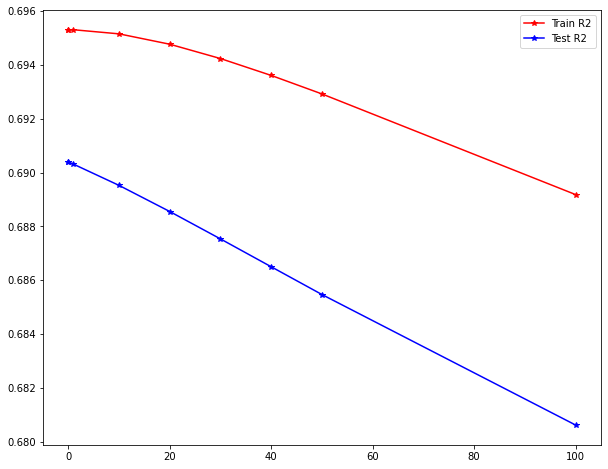

In [172]:
plt.figure(figsize=(10,8))
plt.plot(param_a, train_r, 'r*-')
plt.plot(param_a, test_r, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.show()

In [173]:
ridge_train = np.max(train_r)

In [174]:
ridge_test = np.max(test_r)

In [175]:
param_a[np.argmax(test_r)]

0.001

In [176]:
def Manual_Tune(Alpha, Model, X_train, X_test, y_train, y_test):
    train_r = []
    test_r = []
    for i in Alpha:
        Model = Lasso(alpha=i)
        Model.fit(X_train, y_train)
        y_pred_train = Model.predict(X_train)
        R2_train = r2_score(y_train, y_pred_train)
        train_r.append(R2_train)
        y_pred_test = Model.predict(X_test)
        R2_test = r2_score(y_test, y_pred_test)
        test_r.append(R2_test)
    return train_r, test_r

In [177]:
Model_L = Lasso()

In [178]:
train_Lasso, test_Lasso = Manual_Tune(param_a, Model_L, X_train_1, X_test_1, y_train_1, y_test_1)

C:\Users\elvin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310649741983904.25, tolerance: 222467806227.29187
  model = cd_fast.enet_coordinate_descent(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310650343366724.2, tolerance: 222467806227.29187
  model = cd_fast.enet_coordinate_descent(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310675002474084.06, tolerance: 222467806227.29187
  model = cd_fast.enet_coordinate_descent(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

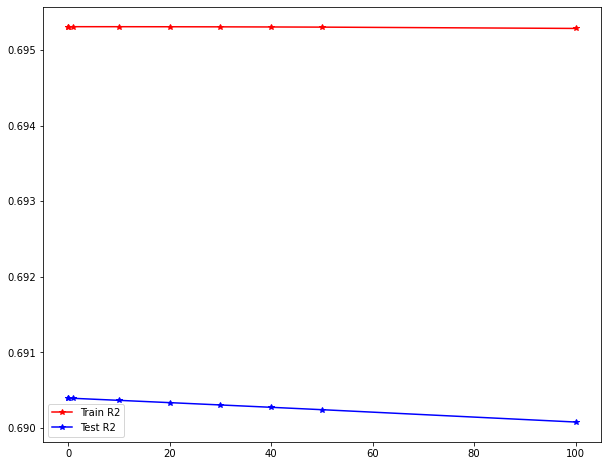

In [179]:
plt.figure(figsize=(10,8))
plt.plot(param_a, train_Lasso, 'r*-')
plt.plot(param_a, test_Lasso, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.show()

In [180]:
lasso_train = np.max(train_Lasso)

In [181]:
lasso_test = np.max(test_Lasso)

In [182]:
param_a[np.argmax(test_Lasso)]

0.001

In [183]:
def Manual_Tune_E(Alpha, X_train, X_test, y_train, y_test):
    train_r = []
    test_r = []
    for i in Alpha:
        Model = ElasticNet(alpha=i)
        Model.fit(X_train, y_train)
        y_pred_train = Model.predict(X_train)
        R2_train = r2_score(y_train, y_pred_train)
        train_r.append(R2_train)
        y_pred_test = Model.predict(X_test)
        R2_test = r2_score(y_test, y_pred_test)
        test_r.append(R2_test)
    return train_r, test_r

In [184]:
train_Enet, test_Enet = Manual_Tune_E(param_a, X_train_1, X_test_1, y_train_1, y_test_1)

C:\Users\elvin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 341399096672330.25, tolerance: 222467806227.29187
  model = cd_fast.enet_coordinate_descent(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 357545364582989.0, tolerance: 222467806227.29187
  model = cd_fast.enet_coordinate_descent(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458309373345607.4, tolerance: 222467806227.29187
  model = cd_fast.enet_coordinate_descent(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

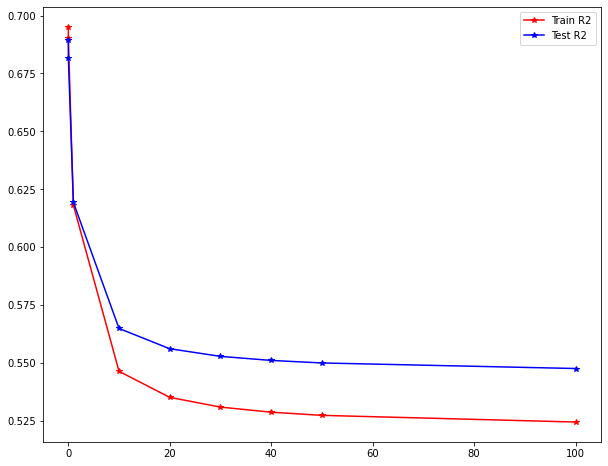

In [185]:
plt.figure(figsize=(10,8))
plt.plot(param_a, train_Enet, 'r*-')
plt.plot(param_a, test_Enet, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.show()

In [186]:
enet_train = np.max(train_Enet)

In [187]:
enet_test = np.max(test_Enet)

In [188]:
param_a[np.argmax(test_Enet)]

0.001

In [189]:
data = {
   'Testing' : [ridge_train, lasso_train,enet_train],
    'Training': [ridge_test, lasso_test, enet_test]
    
}
pd.DataFrame(data, index = ['Ridge', 'Lasso', 'Enet'])

,Testing,Training
Ridge,0.695309,0.690395
Lasso,0.695309,0.690395
Enet,0.695191,0.689650


The highest R2 Score uses ridge and lasso with a value of 0.695 for testing and 0.690 for training

# Optimize 8 (Another algorithm and polynomial)

In [190]:
X = df_pow3
y = df2['price']
X_train_Pow, X_test_Pow, y_train_Pow, y_test_Pow = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [191]:
train_Lasso, test_Lasso = Manual_Tune(param_a, Model_L, X_train_Pow, X_test_Pow, y_train_Pow, y_test_Pow)

C:\Users\elvin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276824857649882.22, tolerance: 222467806227.29187
  model = cd_fast.enet_coordinate_descent(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276808498943859.34, tolerance: 222467806227.29187
  model = cd_fast.enet_coordinate_descent(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275014332725508.44, tolerance: 222467806227.29187
  model = cd_fast.enet_coordinate_descent(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

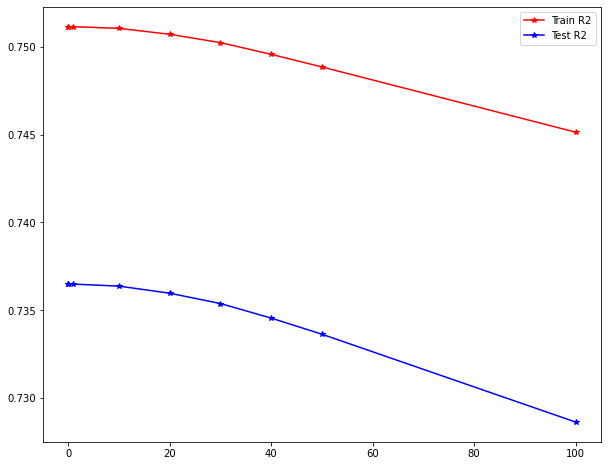

In [192]:
plt.figure(figsize=(10,8))
plt.plot(param_a, train_Lasso, 'r*-')
plt.plot(param_a, test_Lasso, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.show()

In [193]:
lasso_train_p = np.max(train_Lasso)

In [194]:
lasso_test_p = np.max(test_Lasso)

In [195]:
alpha_lasso = param_a[np.argmax(test_Lasso)]
alpha_lasso

1

In [196]:
train_Enet, test_Enet = Manual_Tune_E(param_a, X_train_Pow, X_test_Pow, y_train_Pow, y_test_Pow)

C:\Users\elvin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287791004461300.9, tolerance: 222467806227.29187
  model = cd_fast.enet_coordinate_descent(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 314589910438838.56, tolerance: 222467806227.29187
  model = cd_fast.enet_coordinate_descent(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411655890384265.7, tolerance: 222467806227.29187
  model = cd_fast.enet_coordinate_descent(


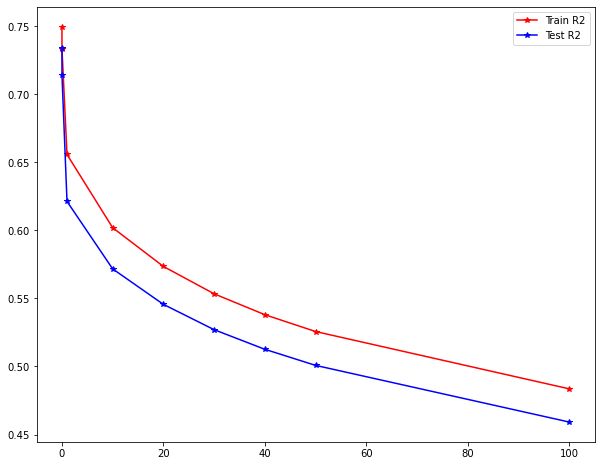

In [197]:
plt.figure(figsize=(10,8))
plt.plot(param_a, train_Enet, 'r*-')
plt.plot(param_a, test_Enet, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.show()

In [198]:
elastic_train_p = np.max(train_Enet)
elastic_train_p

0.7497281103660127

In [199]:
elastic_test_p = np.max(test_Enet)

In [200]:
alpha_elastic = param_a[np.argmax(test_Enet)]

In [201]:
def Manual_Tune_R(Alpha, X_train, X_test, y_train, y_test):
    train_r = []
    test_r = []
    for i in Alpha:
        Model = Ridge(alpha=i)
        Model.fit(X_train, y_train)
        y_pred_train = Model.predict(X_train)
        R2_train = r2_score(y_train, y_pred_train)
        train_r.append(R2_train)
        y_pred_test = Model.predict(X_test)
        R2_test = r2_score(y_test, y_pred_test)
        test_r.append(R2_test)
    return train_r, test_r

In [202]:
train_ridge, test_ridge = Manual_Tune_R(param_a, X_train_Pow, X_test_Pow, y_train_Pow, y_test_Pow)

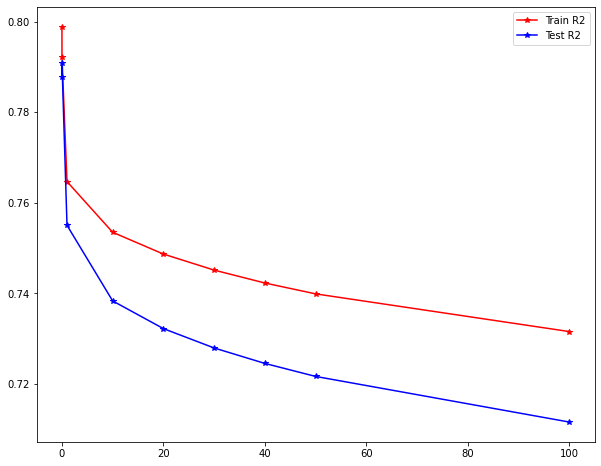

In [203]:
plt.figure(figsize=(10,8))
plt.plot(param_a, train_ridge, 'r*-')
plt.plot(param_a, test_ridge, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.show()

In [204]:
ridge_train_p = np.max(train_ridge)

In [205]:
ridge_test_p = np.max(test_ridge)

In [206]:
alpha_ridge = param_a[np.argmax(test_ridge)]

In [207]:
data = {
   'Testing' : [ridge_train_p, lasso_train_p,elastic_train_p],
    'Training': [ridge_test_p, lasso_test_p, elastic_test_p],
    'Alpha': [alpha_lasso, alpha_elastic, alpha_ridge]
    
}
pd.DataFrame(data, index = ['Lasso', 'Enet', 'Ridge'])

,Testing,Training,Alpha
Lasso,0.798885,0.790805,1.000
Enet,0.751133,0.736492,0.001
Ridge,0.749728,0.734322,0.010


# Evaluasi Model Machine Learning
- The best R2 Score is the machine learning model where the engineering features are carried out polynomial and continued with power transform using the yeo johnson algorithm. After that, it is modeled using the Lasso algorithm with alpha 1 or the Ridge algorithm with alpha 0.01
- The R2 score is 0.798 for Testing and 0.79 for Training.

- Base model R2 Score -> 0.69

# Kesimpulan
- The highest sales were in 2015 in April, while the lowest sales were in 2015 in January. For 2014, sales data from December tended to decline. The sales trend in 2015 has increased. Companies need to take steps to increase sales

- the four classes have almost the same sales. Because the sales of the four classes are almost the same, it can be said that the four classes have the same performance when compared to the others. The price of a house is very dependent on the specifications of the house. Finding out more about prices needs to be done to find out what factors affect house prices so that companies can find out what kind of house specifications have a higher value. Higher value in terms of price will also depend on customer needs. The more customers appreciate a 'value', the higher the value will be.

Faktor-faktor yang mempengaruhi harga rumah
- The number of bathrooms has an effect on house prices. Number of bathrooms 7.75 -> has the highest price. The more the number of bathrooms the higher the price.
- The number of bathrooms with the area of the house, if you see the correlation, has a positive correlation and the value is 0.74 which indicates that the more the number of bathrooms, the bigger the house is
- The house with 2.5 bathrooms is the most sold house
- The more the number of rooms, the bigger the house area.
- The 3 bedroom house is the most sold house
- The larger the house, the more expensive the house price. This is a natural thing because the benchmark house price depends on the area of the house and the area of the land itself.
    -> the cost of building a house is more expensive than the price of the land
     -> The area of the house has more influence on the price than the total land area
 
- the more floors, the more expensive the house is. The number of floors and the price have a positive and strong correlation whose value is 0.71
- The house with only 1 floor number is the most sold house with total sales of 10680. This is followed by a 2-story house and a 1.5-story house.
- A house with a higher view value will have an effect on the price of the house itself. House with a view value of 4 -> the highest average price. View 0 -> average lowest price. If we look at the correlation, the view value has a positive correlation and a strong correlation value is -> 0.9
- The house with a view value of 0 is the most sold house with 19478 houses sold. It can be concluded that the majority of spots / locations in King Country don't have many good views
- A house with a higher condition value will have a higher price. With a positive correlation value and strong correlation.
- According to the table above, the houses in bad condition are very few sold. Condition 1 -> 30 houses, condition 2-> 172 houses
- The grade of the house greatly affects the price of the house itself because the correlation is 1 -> very strong
- House prices are not affected by the year the house was built.
- Prices for houses that have been renovated tend to be higher than those that have not been renovated
- Home sales are dominated by houses built over 2000